# Modelos de Regresión lineal
## Modelo con datos simulados
 * y = a + b * x
 * X : 100 valores distribuídos según una N(1.5, 2.5)
 * Ye = 5 + 1.9 * x + e
 * e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion" : y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,1.153954,7.510300,7.192512
1,0.986361,6.949826,6.874086
2,2.391146,8.278317,9.543177
3,0.977702,5.835034,6.857634
4,6.755871,18.655921,17.836155


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs predcción')

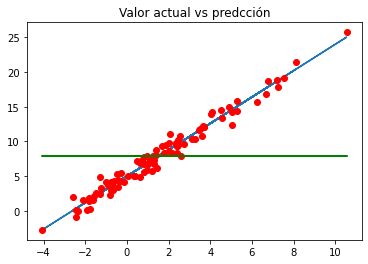

In [11]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs predcción")

In [12]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.153954,7.510300,7.192512,0.462671,0.100990,0.131342
1,0.986361,6.949826,6.874086,0.997253,0.005737,0.851717
2,2.391146,8.278317,9.543177,2.790455,1.599869,0.164516
3,0.977702,5.835034,6.857634,1.030382,1.045710,4.152127
4,6.755871,18.655921,17.836155,99.270214,0.672016,116.277614


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

2677.7172511721924

In [16]:
SSD

74.92095772132657

In [17]:
SST

2714.0846542851614

In [18]:
R2 = SSR / SST
R2

0.9866004904985002

(array([ 3.,  0., 12., 14., 19., 23., 13., 10.,  4.,  2.]),
 array([-2.33933114, -1.88699957, -1.43466799, -0.98233641, -0.53000484,
        -0.07767326,  0.37465831,  0.82698989,  1.27932147,  1.73165304,
         2.18398462]),
 <BarContainer object of 10 artists>)

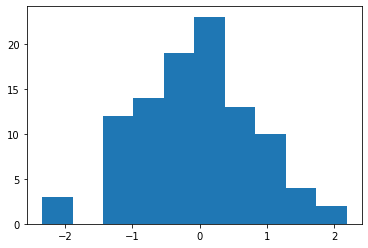

In [19]:
plt.hist((data["y_prediccion"] - data["y_actual"]))

### Obteniendo la recta de regresión
* y = a + b * x
* beta = sum(xi - x_m) * (y_i - y_m)) / sum((xi - x_m)^2)
* alpha = y_m - b * x_m

In [20]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4872328956687184, 7.87271127494982)

In [21]:
data["beta_numerador"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean)
data["beta_denominador"] = (data["x"] - x_mean)**2

In [22]:
beta = sum(data["beta_numerador"])/sum(data["beta_denominador"])

In [23]:
alpha = y_mean - beta * x_mean

In [24]:
alpha, beta

(5.0670800333319175, 1.886477396908559)

El modelo lineal obtenido por regresión es: y = 4.829074232545441 + 1.9129498503087696 * x

In [25]:
data["y_model"] = alpha + beta * data["x"]

In [26]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_numerador,beta_denominador,y_model
0,1.153954,7.510300,7.192512,0.462671,0.100990,0.131342,0.120784,0.111075,7.243987
1,0.986361,6.949826,6.874086,0.997253,0.005737,0.851717,0.462247,0.250873,6.927828
2,2.391146,8.278317,9.543177,2.790455,1.599869,0.164516,0.366632,0.817058,9.577922
3,0.977702,5.835034,6.857634,1.030382,1.045710,4.152127,1.038259,0.259622,6.911493
4,6.755871,18.655921,17.836155,99.270214,0.672016,116.277614,56.812832,27.758549,17.811878


In [27]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)

In [28]:
SSR, SSD, SST

(2639.5199289362586, 74.56472534890732, 2714.0846542851623)

In [29]:
R2 = SSR / SST
R2

0.9725267503240268

Text(0.5, 1.0, 'Valor actual vs predcción')

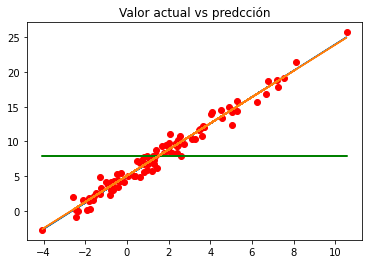

In [30]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs predcción")

Si el p-valor resultante es menor que el nivel de significación, rechazamos la hipótesis nula y aceptamos que existe una relación entre x e y

El estadistico F => F (SSR/k)/(SSD/n-k-1)

RSE = (SSD/n-k-1)**1/2 => mientras menor es el resultado la predicción esta mejor

In [31]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8722754979801997

In [32]:
np.mean(data["y_actual"])

7.87271127494982

In [33]:
error = RSE / np.mean(data["y_actual"])
error

0.11079734382685837

In [34]:
error * 100

11.079734382685837

El margen de error es de: 8.54 %